Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np

# Visualization (optional but recommended)
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Load the Dataset

In [ ]:
from google.colab import files
files.upload()



#https://www.kaggle.com/datasets/mahwiz/students-dropout-and-academic-success-dataset?resource=download


Saving data.csv to data (2).csv


{'data (2).csv': b'\xef\xbb\xbfMarital status;Application mode;Application order;Course;"Daytime/evening attendance\t";Previous qualification;Previous qualification (grade);Nacionality;Mother\'s qualification;Father\'s qualification;Mother\'s occupation;Father\'s occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target\n1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1;1;0;20;0;0;0;0;0;0.0;0;0;0;0;0;0.0;0;1

In [ ]:
import pandas as pd

df = pd.read_csv("data.csv", sep=";")

print(df.shape)
df.head()


(4424, 37)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.columns


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
REG_TARGET = "Curricular units 1st sem (grade)"
CLS_TARGET = "Target"


In [ ]:
df = df.dropna(subset=[REG_TARGET, CLS_TARGET]).copy()
print("Dataset shape after cleaning:", df.shape)


Dataset shape after cleaning: (4424, 37)


In [ ]:
# Separate features and targets
X = df.drop(columns=[REG_TARGET, CLS_TARGET])
y_reg = df[REG_TARGET]
y_cls = df[CLS_TARGET]

print("X shape:", X.shape)
print("y_reg shape:", y_reg.shape)
print("y_cls shape:", y_cls.shape)


X shape: (4424, 35)
y_reg shape: (4424,)
y_cls shape: (4424,)


In [ ]:
# Identify numerical and categorical columns
num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = X.select_dtypes(include=["object", "category"]).columns.tolist()

print("Number of numerical features:", len(num_features))
print("Number of categorical features:", len(cat_features))

print("\nSample numerical features:", num_features[:5])
print("Sample categorical features:", cat_features[:5])


Number of numerical features: 35
Number of categorical features: 0

Sample numerical features: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance']
Sample categorical features: []


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing for numerical features
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)
    ]
)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_reg_train, y_reg_test, y_cls_train, y_cls_test = train_test_split(
    X,
    y_reg,
    y_cls,
    test_size=0.2,
    random_state=42,
    stratify=y_cls
)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)


X_train shape: (3539, 35)
X_test shape : (885, 35)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Build pipeline: preprocessing + model
linear_regression = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

# Train the model
linear_regression.fit(X_train, y_reg_train)

# Make predictions
y_reg_pred_lr = linear_regression.predict(X_test)

# Evaluate performance (version-safe RMSE)
mae_lr = mean_absolute_error(y_reg_test, y_reg_pred_lr)
rmse_lr = mean_squared_error(y_reg_test, y_reg_pred_lr) ** 0.5
r2_lr = r2_score(y_reg_test, y_reg_pred_lr)

print("LINEAR REGRESSION RESULTS")
print("MAE :", mae_lr)
print("RMSE:", rmse_lr)
print("R²  :", r2_lr)


LINEAR REGRESSION RESULTS
MAE : 1.4826303996803205
RMSE: 2.201855270223444
R²  : 0.783413392976517


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Polynomial Regression pipeline
poly_regression = Pipeline([
    ("preprocessor", preprocessor),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", LinearRegression())
])

# Train model
poly_regression.fit(X_train, y_reg_train)

# Predict
y_reg_pred_poly = poly_regression.predict(X_test)

# Evaluate
mae_poly = mean_absolute_error(y_reg_test, y_reg_pred_poly)
rmse_poly = mean_squared_error(y_reg_test, y_reg_pred_poly) ** 0.5
r2_poly = r2_score(y_reg_test, y_reg_pred_poly)

print("POLYNOMIAL REGRESSION RESULTS")
print("MAE :", mae_poly)
print("RMSE:", rmse_poly)
print("R²  :", r2_poly)


POLYNOMIAL REGRESSION RESULTS
MAE : 1.2835663646115532
RMSE: 2.2564343577399835
R²  : 0.7725429157907094


In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Support Vector Regression with Linear Kernel
svr_linear = Pipeline([
    ("preprocessor", preprocessor),
    ("model", SVR(kernel="linear"))
])

# Train model
svr_linear.fit(X_train, y_reg_train)

# Predict
y_reg_pred_svr_linear = svr_linear.predict(X_test)

# Evaluate
mae_svr_linear = mean_absolute_error(y_reg_test, y_reg_pred_svr_linear)
rmse_svr_linear = mean_squared_error(y_reg_test, y_reg_pred_svr_linear) ** 0.5
r2_svr_linear = r2_score(y_reg_test, y_reg_pred_svr_linear)

print("SVR (LINEAR KERNEL) RESULTS")
print("MAE :", mae_svr_linear)
print("RMSE:", rmse_svr_linear)
print("R²  :", r2_svr_linear)


SVR (LINEAR KERNEL) RESULTS
MAE : 1.247323545430471
RMSE: 2.637399730346464
R²  : 0.6892536940061654


In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Support Vector Regression with RBF Kernel
svr_rbf = Pipeline([
    ("preprocessor", preprocessor),
    ("model", SVR(kernel="rbf", C=1.0, gamma="scale"))
])

# Train model
svr_rbf.fit(X_train, y_reg_train)

# Predict
y_reg_pred_svr_rbf = svr_rbf.predict(X_test)

# Evaluate
mae_svr_rbf = mean_absolute_error(y_reg_test, y_reg_pred_svr_rbf)
rmse_svr_rbf = mean_squared_error(y_reg_test, y_reg_pred_svr_rbf) ** 0.5
r2_svr_rbf = r2_score(y_reg_test, y_reg_pred_svr_rbf)

print("SVR (RBF KERNEL) RESULTS")
print("MAE :", mae_svr_rbf)
print("RMSE:", rmse_svr_rbf)
print("R²  :", r2_svr_rbf)


SVR (RBF KERNEL) RESULTS
MAE : 1.4160602188975357
RMSE: 2.5321622156019523
R²  : 0.713557729283633


In [ ]:
import pandas as pd

results_regression = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Polynomial Regression",
        "SVR (Linear)",
        "SVR (RBF)"
    ],
    "MAE": [
        mae_lr,
        mae_poly,
        mae_svr_linear,
        mae_svr_rbf
    ],
    "RMSE": [
        rmse_lr,
        rmse_poly,
        rmse_svr_linear,
        rmse_svr_rbf
    ],
    "R2": [
        r2_lr,
        r2_poly,
        r2_svr_linear,
        r2_svr_rbf
    ]
})

results_regression.sort_values("RMSE")


,Model,MAE,RMSE,R2
0,Linear Regression,1.482630,2.201855,0.783413
1,Polynomial Regression,1.283566,2.256434,0.772543
3,SVR (RBF),1.416060,2.532162,0.713558
2,SVR (Linear),1.247324,2.637400,0.689254


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to convert grades to risk categories
def grade_to_risk(y):
    return np.where(
        y < 10, "High Risk",
        np.where(y < 13, "Medium Risk", "Low Risk")
    )

# True risk labels (from actual grades)
y_true_risk = grade_to_risk(y_reg_test)

# Predicted risk labels from each model
y_lr_risk = grade_to_risk(y_reg_pred_lr)
y_poly_risk = grade_to_risk(y_reg_pred_poly)
y_svr_linear_risk = grade_to_risk(y_reg_pred_svr_linear)
y_svr_rbf_risk = grade_to_risk(y_reg_pred_svr_rbf)


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

labels = ["High Risk", "Medium Risk", "Low Risk"]

def show_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    print("\n" + title)
    display(cm_df)

# Confusion Matrices
show_cm(y_true_risk, y_lr_risk, "Confusion Matrix — Linear Regression")
show_cm(y_true_risk, y_poly_risk, "Confusion Matrix — Polynomial Regression")
show_cm(y_true_risk, y_svr_linear_risk, "Confusion Matrix — SVR (Linear Kernel)")
show_cm(y_true_risk, y_svr_rbf_risk, "Confusion Matrix — SVR (RBF Kernel)")



Confusion Matrix — Linear Regression


,High Risk,Medium Risk,Low Risk
High Risk,135,1,0
Medium Risk,60,249,136
Low Risk,19,101,184



Confusion Matrix — Polynomial Regression


,High Risk,Medium Risk,Low Risk
High Risk,136,0,0
Medium Risk,47,288,110
Low Risk,12,89,203



Confusion Matrix — SVR (Linear Kernel)


,High Risk,Medium Risk,Low Risk
High Risk,131,4,1
Medium Risk,39,322,84
Low Risk,13,86,205



Confusion Matrix — SVR (RBF Kernel)


,High Risk,Medium Risk,Low Risk
High Risk,127,9,0
Medium Risk,37,345,63
Low Risk,12,106,186


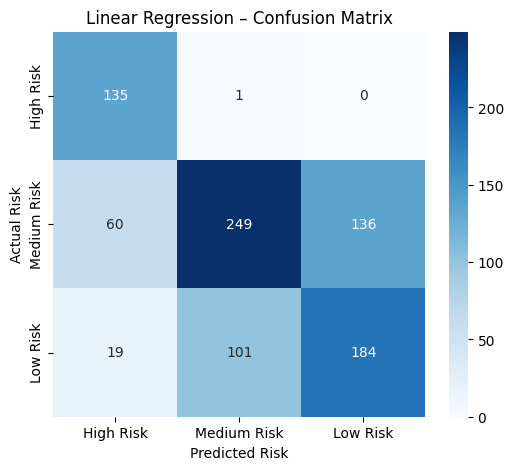

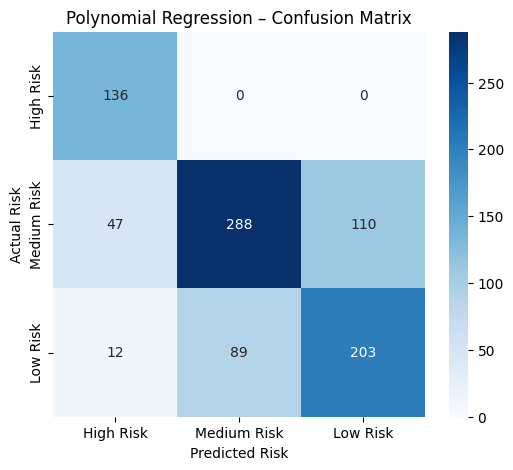

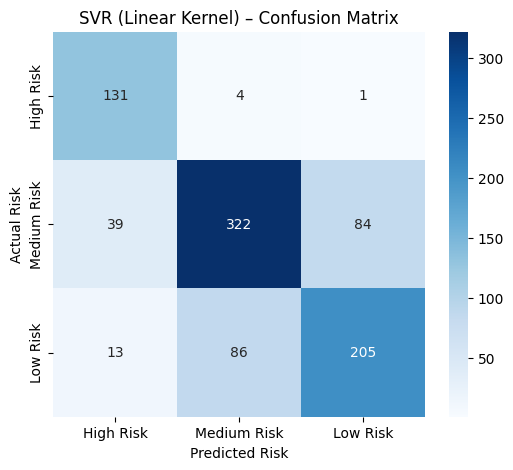

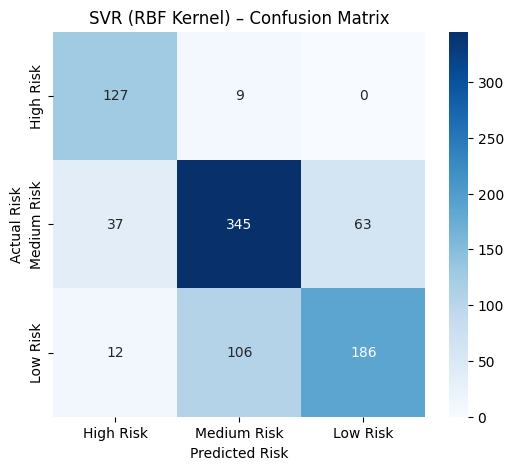

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

labels = ["High Risk", "Medium Risk", "Low Risk"]

def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=labels,
        yticklabels=labels
    )
    plt.xlabel("Predicted Risk")
    plt.ylabel("Actual Risk")
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_cm(y_true_risk, y_lr_risk, "Linear Regression – Confusion Matrix")
plot_cm(y_true_risk, y_poly_risk, "Polynomial Regression – Confusion Matrix")
plot_cm(y_true_risk, y_svr_linear_risk, "SVR (Linear Kernel) – Confusion Matrix")
plot_cm(y_true_risk, y_svr_rbf_risk, "SVR (RBF Kernel) – Confusion Matrix")


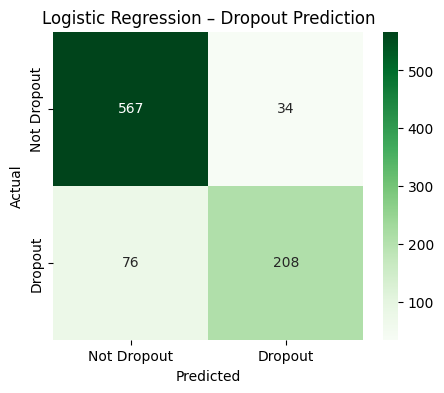

              precision    recall  f1-score   support

 Not Dropout       0.88      0.94      0.91       601
     Dropout       0.86      0.73      0.79       284

    accuracy                           0.88       885
   macro avg       0.87      0.84      0.85       885
weighted avg       0.87      0.88      0.87       885



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Target to binary: Dropout = 1, Others = 0
y_cls_binary = (y_cls == "Dropout").astype(int)

# Train-test split already exists, so align targets
y_cls_train_bin = (y_cls_train == "Dropout").astype(int)
y_cls_test_bin = (y_cls_test == "Dropout").astype(int)

# Logistic Regression classifier
log_reg = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

# Train
log_reg.fit(X_train, y_cls_train_bin)

# Predict
y_cls_pred = log_reg.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_cls_test_bin, y_cls_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=["Not Dropout", "Dropout"],
    yticklabels=["Not Dropout", "Dropout"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression – Dropout Prediction")
plt.show()

# Classification report
print(classification_report(y_cls_test_bin, y_cls_pred, target_names=["Not Dropout", "Dropout"]))


In [ ]:
pd.DataFrame({
    "Actual Grade": y_reg_test,
    "Predicted Grade": y_reg_pred_svr_rbf,
    "Predicted Risk": y_svr_rbf_risk
}).head(10)


,Actual Grade,Predicted Grade,Predicted Risk
1853,14.000000,14.320074,Low Risk
2399,12.492857,12.411011,Medium Risk
510,10.750000,5.470403,High Risk
242,11.600000,12.976503,Medium Risk
3392,13.000000,12.638398,Medium Risk
1787,13.500000,12.863481,Medium Risk
1158,11.800000,12.448049,Medium Risk
260,11.166667,11.848456,Medium Risk
1852,12.600000,11.783149,Medium Risk
1191,12.041429,12.615999,Medium Risk
